<a href="https://colab.research.google.com/github/Rajvee-Sharma/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Title : Predicting whether the customer will default on his/her Credit Card**

## **Problem description**

This project is aimed at predicting the case of customers default payment.From the perspective of risk management, the result of predictive accuracy of estimated probablity of default will be more valuable then binary result of classification - credible or non-credible clients. We can use K-S chart to evaluate which customers will default on their credit card payment.

## **Data Description-**

**Attribute information**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:


*   X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
*  X2: Gender(1=male, 2=female)


*  X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
*  X4: Marital status (1 = married; 2 = single; 3 = others).
*  X5: Age(years)


*   X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above
*  X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.


*  X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.










In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_credit = pd.read_csv('/content/drive/MyDrive/default of credit card clients(F).csv')

In [ ]:
pd.__version__

'1.3.5'

In [ ]:
pip install --upgrade xlrd 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
df_credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df_credit.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


### **Understanding of data**

In [ ]:
df_credit.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df_credit.shape

(30000, 25)

In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df_credit.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_credit.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
df_credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### **Exploratory Data Analysis**


Dependent Variable

In [ ]:
df_credit.rename(columns = {'default payment next month' : 'defaulter'}, inplace=True)

In [ ]:
df_credit['defaulter'].value_counts()

0    23364
1     6636
Name: defaulter, dtype: int64

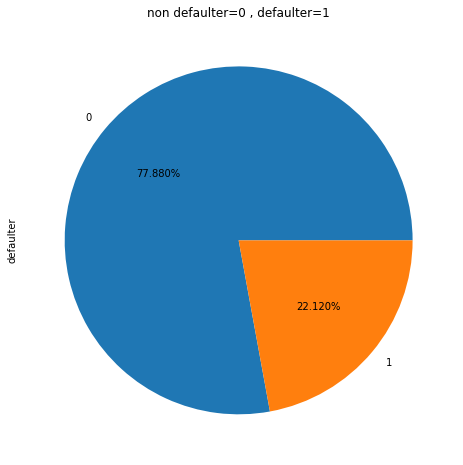

In [ ]:
df_credit['defaulter'].value_counts().plot(kind='pie', autopct='%1.3f%%', figsize=(8,8))
plt.title('non defaulter=0 , defaulter=1')
plt.show()

### **Independent Variable**

 Credit limit balance

In [ ]:
df_credit['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

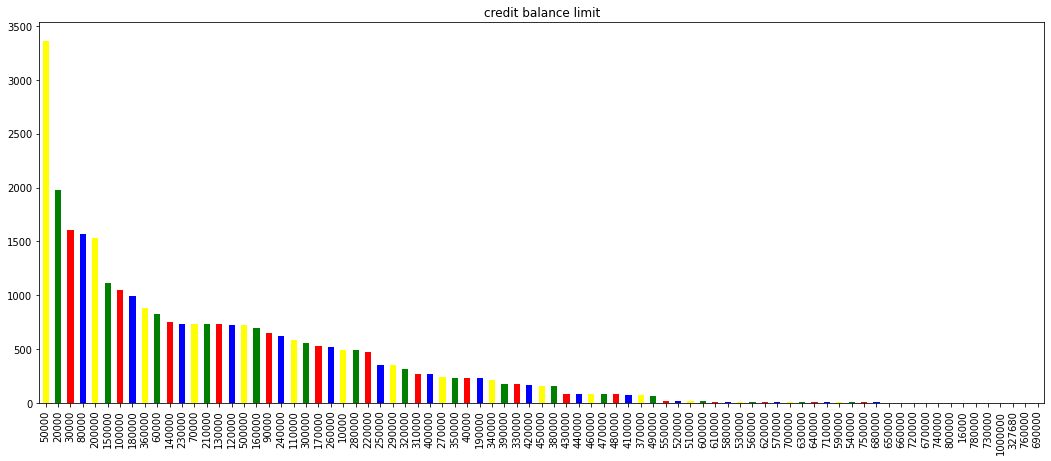

In [ ]:
plt.figure(figsize=(18,7))
df_credit['LIMIT_BAL'].value_counts().plot(kind='bar', color={'red', 'yellow', 'green','blue'})
plt.title('credit balance limit')
plt.show()

In [ ]:
df_credit['LIMIT_BAL'].max()

1000000

In [ ]:
df_credit['LIMIT_BAL'].min()

10000

**Sex**

Male=1

Female=2

In [ ]:
df_credit['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

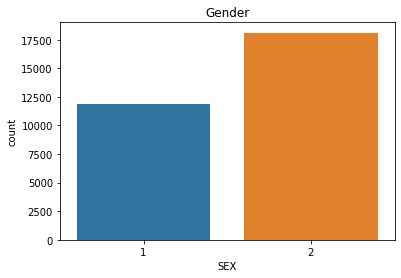

In [ ]:
sb.countplot(df_credit['SEX'])
plt.title('Gender')
plt.show()

### **Education**

graduate = 1 

university = 2

high school = 3

others = 0

In [ ]:
df_credit['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
df_credit['EDUCATION'] = df_credit['EDUCATION'].replace({4:0, 5:0, 6:0})

In [ ]:
df_credit['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

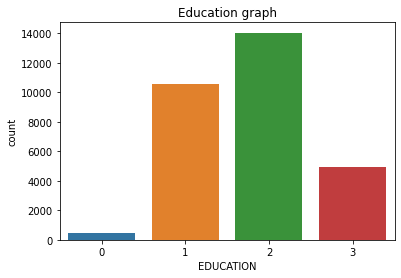

In [ ]:
sb.countplot(df_credit['EDUCATION'])
plt.title('Education graph')
plt.show()

### **Marriage**

In [ ]:
df_credit['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df_credit['MARRIAGE'] = df_credit['MARRIAGE'].replace({0:3})

In [ ]:
df_credit['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

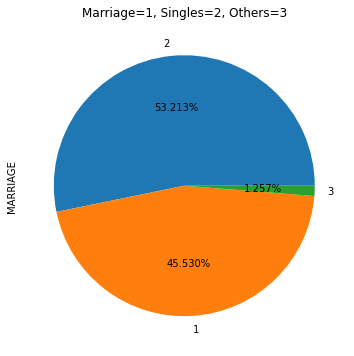

In [ ]:
df_credit['MARRIAGE'].value_counts().plot(kind='pie',  autopct='%1.3f%%', figsize=(6,6))
plt.title('Marriage=1, Singles=2, Others=3')
plt.show()

### **Age**

In [ ]:
df_credit['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

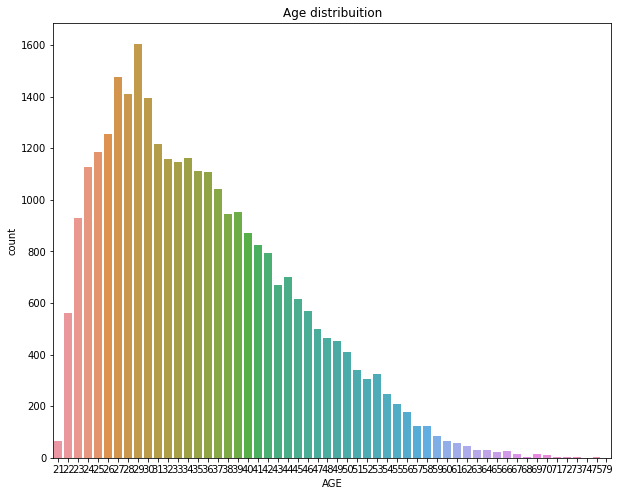

In [ ]:
plt.figure(figsize=(10,8))
sb.countplot(df_credit['AGE'])
plt.title('Age distribuition')
plt.show()

In [ ]:
df_credit.rename(columns={'PAY_0':'PAY_SEPT', 'PAY_2':'PAY_AUG', 'PAY_3':'PAY_JUL', 'PAY_4':'PAY_JUN', 'PAY_5':'PAY_MAY', 'PAY_6':'PAY_APR' }, inplace=True)
df_credit.rename(columns={'BILL_AMT1': 'BILL_AMT_SEPT', 'BILL_AMT2':'BILL_AMT_AUG', 'BILL_AMT3':'BILL_AMT_JUL', 'BILL_AMT4':'BILL_AMT_JUN', 'BILL_AMT5':'BILL_AMT_MAY', 'BILL_AMT6':'BILL_AMT_APR'}, inplace=True)
df_credit.rename(columns={'PAY_AMT1': 'PAY_AMT_SEPT', 'PAY_AMT2':'PAY_AMT_AUG', 'PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN', 'PAY_AMT5':'PAY_AMT_MAY', 'PAY_AMT6':'PAY_AMT_APR'}, inplace=True)

In [ ]:
df_credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
len(df_credit[df_credit.duplicated()])

0

**BIll AMOUNT**

In [ ]:
print(df_credit['BILL_AMT_APR'].value_counts())
print('\n')
print('\n')

print(df_credit['BILL_AMT_MAY'].value_counts())
print('\n')
print('\n')

print(df_credit['BILL_AMT_JUN'].value_counts())
print('\n')
print('\n')

print(df_credit['BILL_AMT_JUL'].value_counts())
print('\n')
print('\n')

print(df_credit['BILL_AMT_AUG'].value_counts())
print('\n')
print('\n')

print(df_credit['BILL_AMT_SEPT'].value_counts())
print('\n')
print('\n')

0         4020
390        207
780         86
150         78
316         77
          ... 
26852        1
108660       1
480          1
15298        1
15313        1
Name: BILL_AMT_APR, Length: 20604, dtype: int64




0        3506
390       235
780        94
316        79
326        62
         ... 
19341       1
66726       1
80682       1
28508       1
32428       1
Name: BILL_AMT_MAY, Length: 21010, dtype: int64




0         3195
390        246
780        101
316         68
326         62
          ... 
97189        1
118839       1
23567        1
18377        1
36535        1
Name: BILL_AMT_JUN, Length: 21548, dtype: int64




0         2870
390        275
780         74
326         63
316         62
          ... 
19580        1
45129        1
227807       1
39330        1
49764        1
Name: BILL_AMT_JUL, Length: 22026, dtype: int64




0        2506
390       231
326        75
780        75
316        72
         ... 
26357       1
85195       1
6889        1
11004       1
489

<function matplotlib.pyplot.show(*args, **kw)>

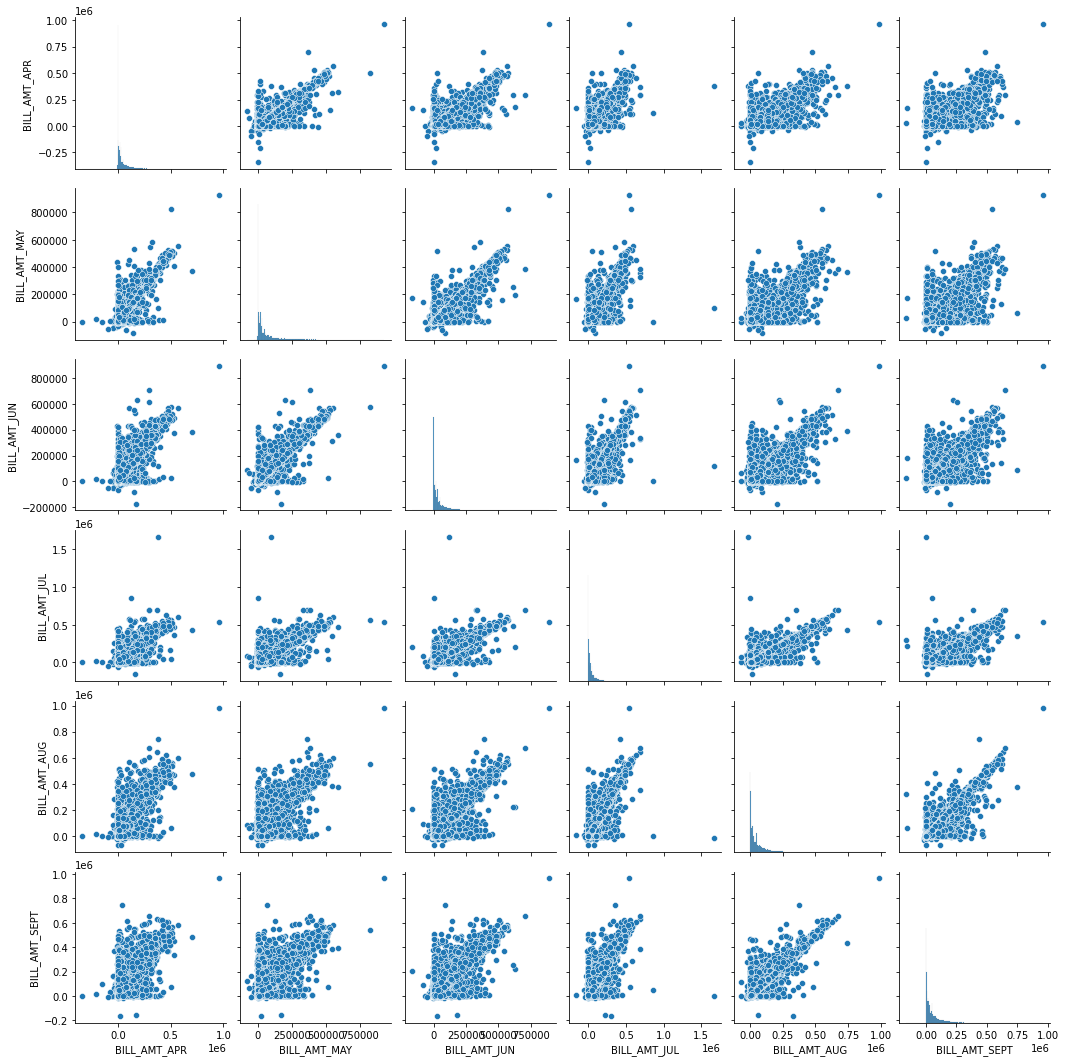

In [ ]:
amount_bill = df_credit[['BILL_AMT_APR', 'BILL_AMT_MAY', 'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEPT']]

sb.pairplot(data=amount_bill)
plt.show

### **Previous payment**

In [ ]:
df_credit.groupby(['PAY_SEPT', 'defaulter']).size()

PAY_SEPT  defaulter
-2        0             2394
          1              365
-1        0             4732
          1              954
 0        0            12849
          1             1888
 1        0             2436
          1             1252
 2        0              823
          1             1844
 3        0               78
          1              244
 4        0               24
          1               52
 5        0               13
          1               13
 6        0                5
          1                6
 7        0                2
          1                7
 8        0                8
          1               11
dtype: int64

In [ ]:
df_credit.groupby(['PAY_AUG', 'defaulter']).size()

PAY_AUG  defaulter
-2       0             3091
         1              691
-1       0             5084
         1              966
 0       0            13227
         1             2503
 1       0               23
         1                5
 2       0             1743
         1             2184
 3       0              125
         1              201
 4       0               49
         1               50
 5       0               10
         1               15
 6       0                3
         1                9
 7       0                8
         1               12
 8       0                1
dtype: int64

In [ ]:
df_credit.groupby(['PAY_JUL', 'defaulter']).size()

PAY_JUL  defaulter
-2       0             3328
         1              757
-1       0             5012
         1              926
 0       0            13013
         1             2751
 1       0                3
         1                1
 2       0             1850
         1             1969
 3       0              102
         1              138
 4       0               32
         1               44
 5       0                9
         1               12
 6       0                9
         1               14
 7       0                5
         1               22
 8       0                1
         1                2
dtype: int64

In [ ]:
df_credit.groupby(['PAY_JUN', 'defaulter']).size()

PAY_JUN  defaulter
-2       0             3511
         1              837
-1       0             4783
         1              904
 0       0            13439
         1             3016
 1       0                1
         1                1
 2       0             1506
         1             1653
 3       0               70
         1              110
 4       0               23
         1               46
 5       0               17
         1               18
 6       0                3
         1                2
 7       0               10
         1               48
 8       0                1
         1                1
dtype: int64

In [ ]:
df_credit.groupby(['PAY_MAY', 'defaulter']).size()

PAY_MAY  defaulter
-2       0             3651
         1              895
-1       0             4642
         1              897
 0       0            13752
         1             3195
 2       0             1203
         1             1423
 3       0               65
         1              113
 4       0               33
         1               51
 5       0                7
         1               10
 6       0                1
         1                3
 7       0               10
         1               48
 8       1                1
dtype: int64

In [ ]:

df_credit.groupby(['PAY_APR', 'defaulter']).size()

PAY_APR  defaulter
-2       0             3914
         1              981
-1       0             4765
         1              975
 0       0            13217
         1             3069
 2       0             1365
         1             1401
 3       0               66
         1              118
 4       0               18
         1               31
 5       0                6
         1                7
 6       0                5
         1               14
 7       0                8
         1               38
 8       1                2
dtype: int64

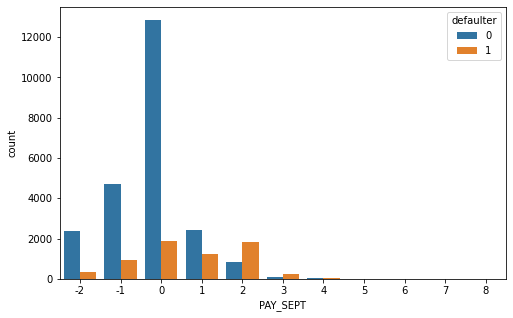

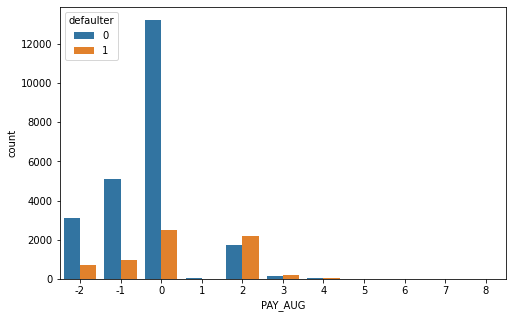

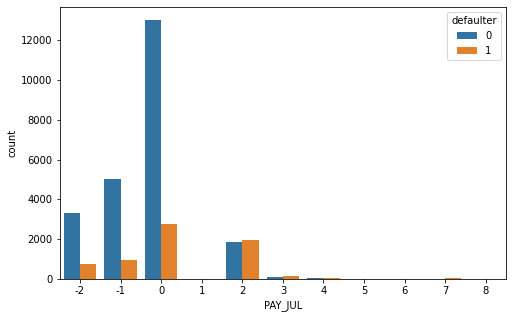

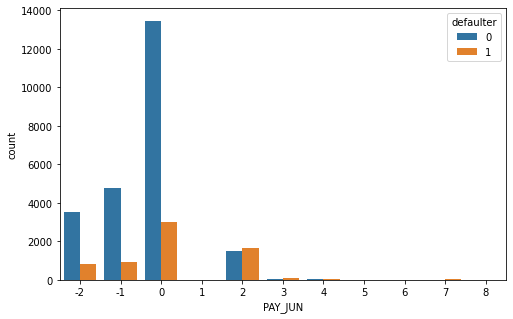

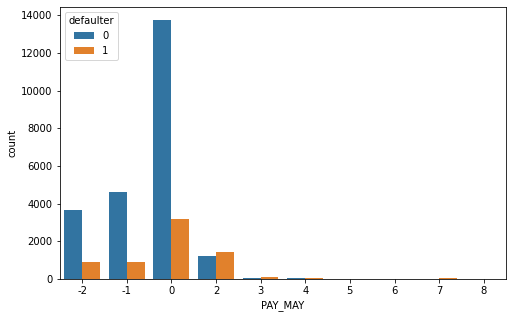

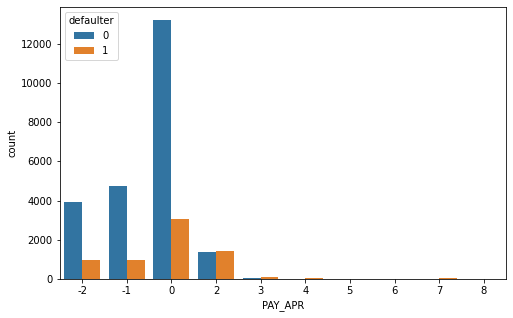

In [ ]:
payment = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

for col in payment:
  plt.figure(figsize=(8,5))
  sb.countplot(x= col, hue='defaulter', data=df_credit)

**The distribuition amount of previous payment for each month**

In [ ]:
amount_pay = df_credit[['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN','PAY_MAY', 'PAY_APR']]

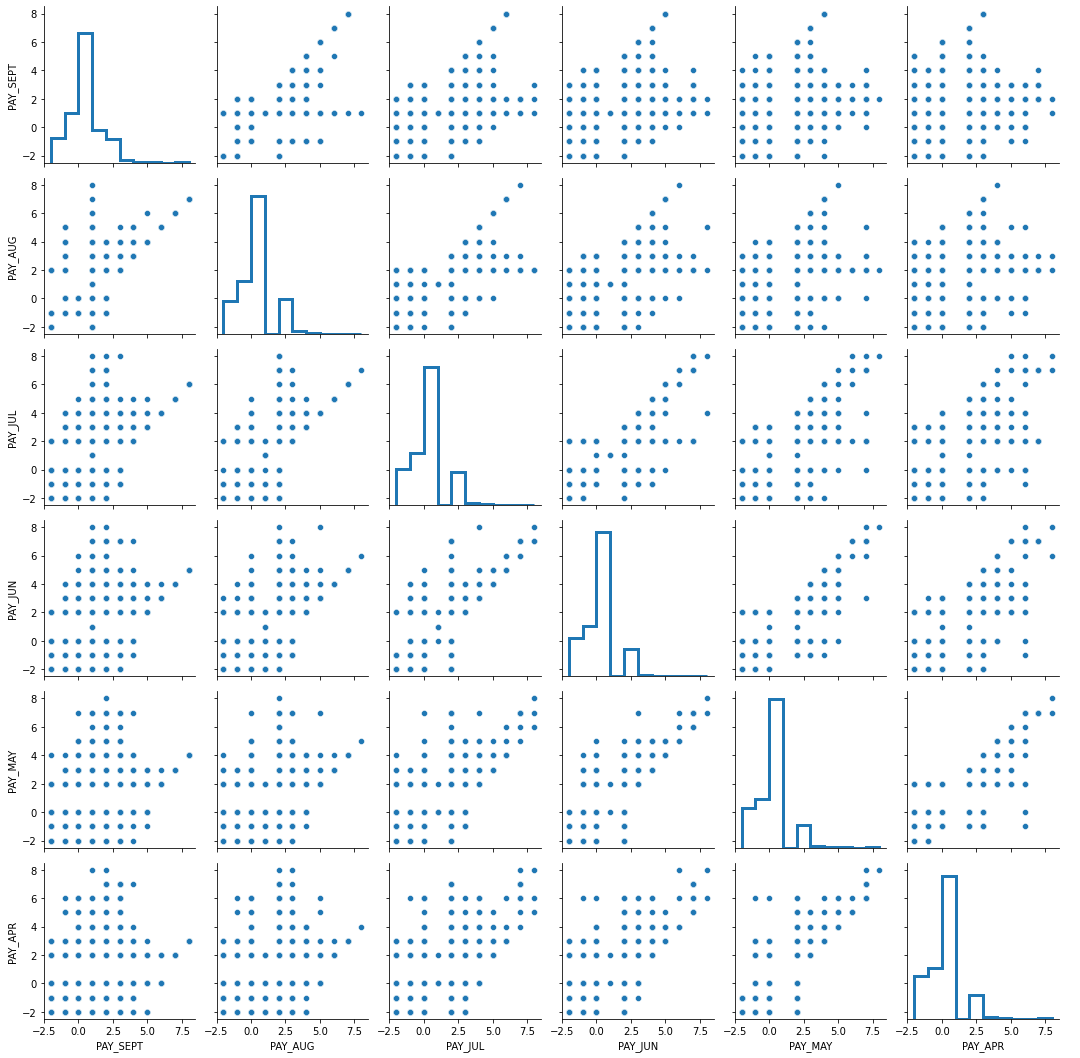

In [ ]:
g = sb.PairGrid(amount_pay, palette='bright')
g.map_upper(sb.scatterplot)
g.map_lower(sb.scatterplot)
g.map_diag(plt.hist, histtype='step', linewidth=3)
g.add_legend()

### **Bivariate analysis**

Defaulter v/s sex

In [ ]:
df_credit.groupby(['SEX', 'defaulter']).size()

SEX  defaulter
1    0             9015
     1             2873
2    0            14349
     1             3763
dtype: int64

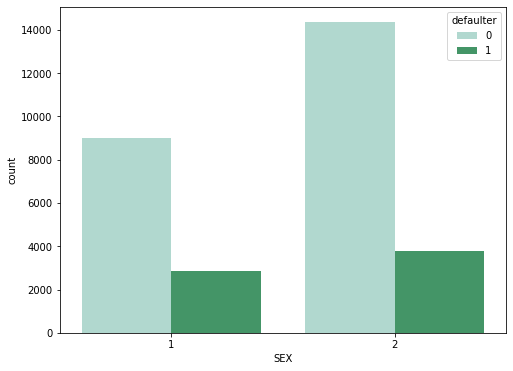

In [ ]:
plt.figure(figsize=(8,6))
sb.countplot(x='SEX', hue='defaulter', data=df_credit, palette='BuGn')
plt.show()

### **Education v/s defaulter**

In [ ]:
df_credit.groupby(['EDUCATION', 'defaulter']).size()

EDUCATION  defaulter
0          0              435
           1               33
1          0             8549
           1             2036
2          0            10700
           1             3330
3          0             3680
           1             1237
dtype: int64

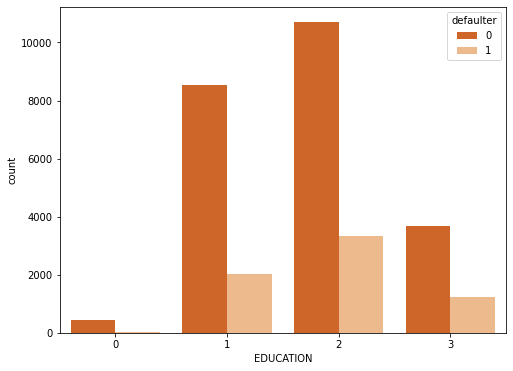

In [ ]:
plt.figure(figsize=(8,6))
sb.countplot(x='EDUCATION', hue='defaulter', data=df_credit, palette='Oranges_r')
plt.show()

### **Marriage people v/s defaulter**

In [ ]:
df_credit.groupby(['MARRIAGE', 'defaulter']).size()

MARRIAGE  defaulter
1         0            10453
          1             3206
2         0            12623
          1             3341
3         0              288
          1               89
dtype: int64

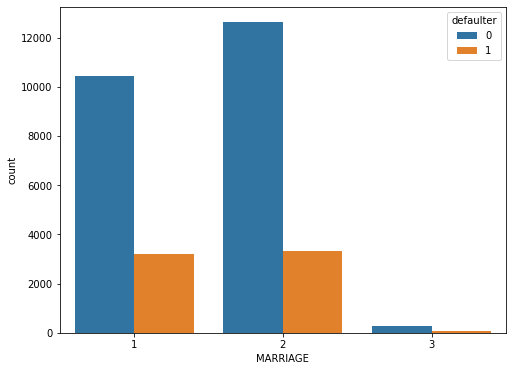

In [ ]:
plt.figure(figsize=(8,6))
sb.countplot(x='MARRIAGE', hue='defaulter', data=df_credit)
plt.show()

**Age v/s defaulter**

In [ ]:
df_credit.groupby(['AGE', 'defaulter']).size()

AGE  defaulter
21   0             53
     1             14
22   0            391
     1            169
23   0            684
                 ... 
73   1              3
74   0              1
75   0              2
     1              1
79   0              1
Length: 109, dtype: int64

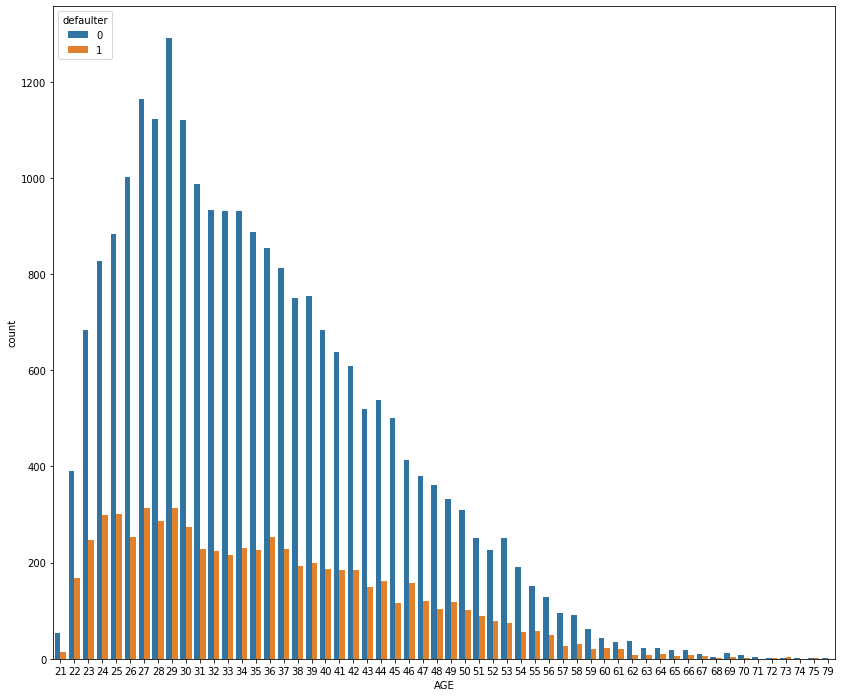

In [ ]:
plt.figure(figsize=(14,12))
sb.countplot(x='AGE', hue='defaulter', data=df_credit)
plt.show()

In [ ]:
df_credit.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


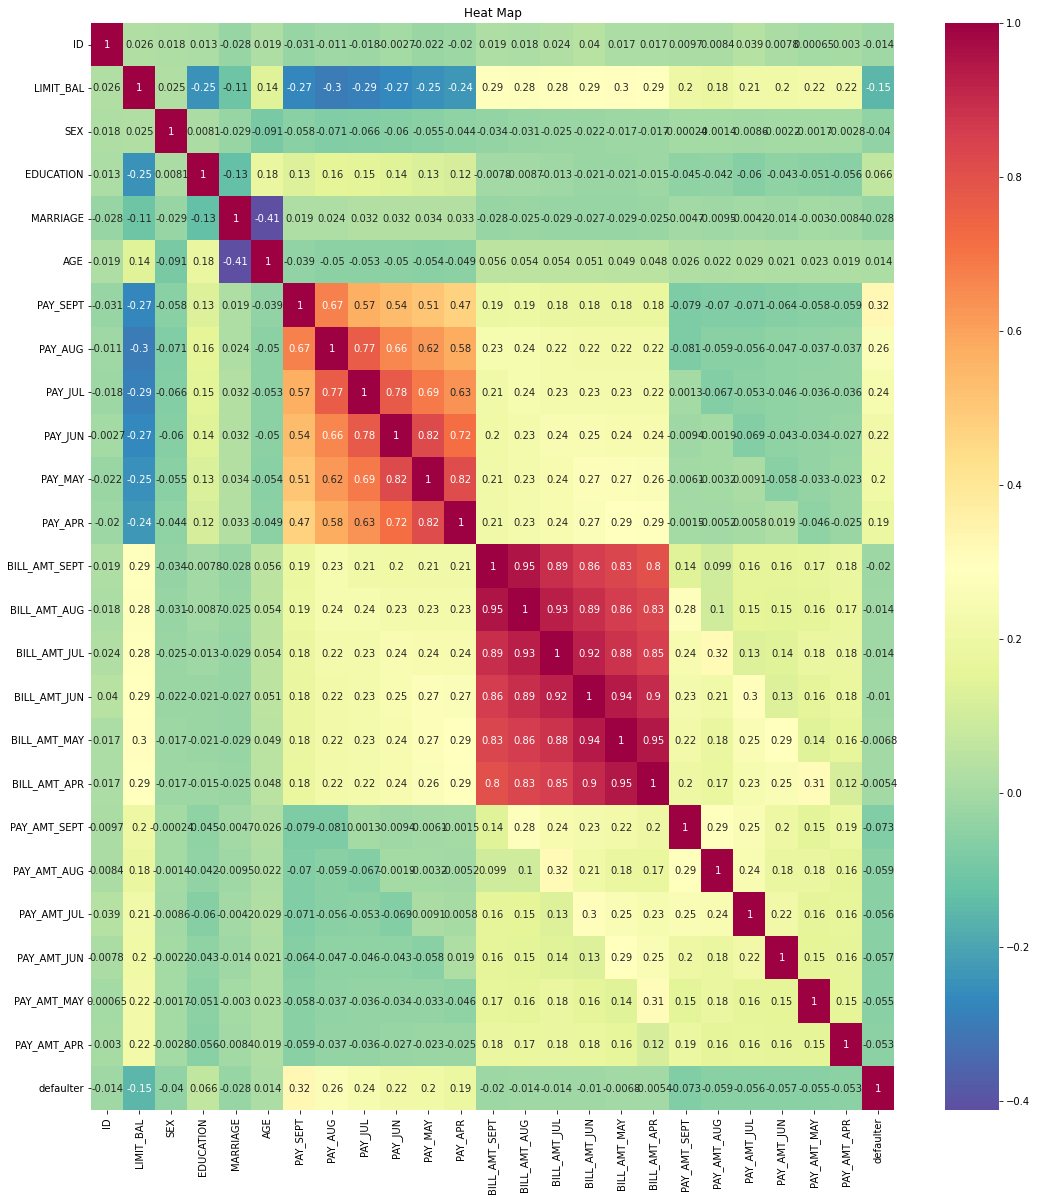

In [ ]:
plt.figure(figsize=(18,20))
correlation = df_credit.corr()
sb.heatmap(correlation, annot=True, cmap='Spectral_r')
plt.title('Heat Map')
plt.show()

In [ ]:
df_credit.drop(['ID'], axis=1, inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):

  vif=pd.DataFrame()
  vif['variables'] = x.columns
  vif['VIF']= [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

  return(vif)

In [ ]:
calc_vif(df_credit[[i for i in df_credit.describe().columns if i not in ['BILL_AMT_SEPT', 'PAY_SEPT', 'PAY_AMT_SEPT']]])

,variables,VIF
0,LIMIT_BAL,3.994108
1,SEX,9.123593
2,EDUCATION,7.302312
3,MARRIAGE,6.374531
4,AGE,11.344442
5,PAY_AUG,2.690207
6,PAY_JUL,3.683818
7,PAY_JUN,4.426731
8,PAY_MAY,4.983557
9,PAY_APR,3.459377


In [ ]:
df_credit['payment value'] = df_credit['PAY_SEPT'] + df_credit['PAY_AUG'] + df_credit['PAY_JUL'] + df_credit['PAY_JUN'] + df_credit['PAY_MAY'] + df_credit['PAY_APR']

In [ ]:
df_credit.drop(['PAY_SEPT', 'BILL_AMT_SEPT', 'PAY_AMT_SEPT'], axis=1, inplace=True)

In [ ]:
df_credit['defaulter'].value_counts()

0    23364
1     6636
Name: defaulter, dtype: int64

In [ ]:
df_credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,defaulter,payment value
0,20000,2,2,1,24,2,-1,-1,-2,-2,...,0,0,0,689,0,0,0,0,1,-2
1,120000,2,2,2,26,2,0,0,0,2,...,3272,3455,3261,1000,1000,1000,0,2000,1,3
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1500,1000,1000,1000,5000,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2019,1200,1100,1069,1000,0,0
4,50000,1,2,1,57,0,-1,0,0,0,...,20940,19146,19131,36681,10000,9000,689,679,0,-2


### **Feature engineering**

One hot encoding

In [ ]:
df_credit = pd.get_dummies(df_credit, columns=['SEX', 'MARRIAGE', 'EDUCATION'])

In [ ]:
df_credit.head(1)

,LIMIT_BAL,AGE,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,...,payment value,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3
0,20000,24,2,-1,-1,-2,-2,3102,689,0,...,-2,0,1,1,0,0,0,0,1,0


In [ ]:
df_credit.shape

(30000, 28)

In [ ]:
independent_var = df_credit.drop(['defaulter'], axis=1)

In [ ]:
dependent_var = df_credit['defaulter']

In [ ]:
x = independent_var
y = dependent_var

In [ ]:
x.head()

,LIMIT_BAL,AGE,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,...,payment value,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3
0,20000,24,2,-1,-1,-2,-2,3102,689,0,...,-2,0,1,1,0,0,0,0,1,0
1,120000,26,2,0,0,0,2,1725,2682,3272,...,3,0,1,0,1,0,0,0,1,0
2,90000,34,0,0,0,0,0,14027,13559,14331,...,0,0,1,0,1,0,0,0,1,0
3,50000,37,0,0,0,0,0,48233,49291,28314,...,0,0,1,1,0,0,0,0,1,0
4,50000,57,0,-1,0,0,0,5670,35835,20940,...,-2,1,0,1,0,0,0,0,1,0


In [ ]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: defaulter, Length: 30000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=17, stratify=y)
print(x_train.shape)
print(x_test.shape)

(24000, 27)
(6000, 27)


**Applying SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_sm, y_train_sm = smote.fit_resample(x,y)

from collections import Counter
print('Original Dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_sm))
Counter(y_train_sm)

Original Dataset shape Counter({0: 18691, 1: 5309})
Resample dataset shape Counter({1: 23364, 0: 23364})


Counter({1: 23364, 0: 23364})

**Model evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report 

In [ ]:
def print_metrics(actual, predicted):
  print('accuracy_score is {}'.format(accuracy_score(actual,predicted)))
  print('precision_score is {}'.format(precision_score(actual,predicted)))

  print('recall_score is {}'.format(recall_score(actual,predicted)))
  print('f1_score is {}'. format(f1_score(actual,predicted)))
  print('roc_auc_score is {}'.format(roc_auc_score(actual,predicted)))
  print('confusion_matrix is {}'.format(confusion_matrix(actual,predicted)))
  print('classification_report is {}'.format(classification_report(actual,predicted)))

**Implementing logistic regression**

In [ ]:
# x_train_os, y_train_os, x_test_os, y_test_os = train_test_split(x_train_sm, y_train_sm, test_size=0.20, random_state=17, stratify = y_train_sm)
x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x_train_sm, y_train_sm, test_size=0.20, random_state=17, stratify = y_train_sm)

In [ ]:
x_train_os.shape

(37382, 27)

In [ ]:
y_train_os.shape

(37382,)

In [ ]:
x_test_os.shape

(9346, 27)

In [ ]:
x_train_sm.shape
y_train_sm.shape

(46728,)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
lr = LogisticRegression()

In [ ]:
param_grid = {'penalty':['l1','l2'], 'C':[100,150,200]}

model_log = GridSearchCV(lr, param_grid, scoring='accuracy', cv=5)
model_log.fit(x_train_os, y_train_os)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 150, 200], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
optimized_log = model_log.best_estimator_
optimized_log

LogisticRegression(C=200)

In [ ]:
model_log.best_params_

{'C': 200, 'penalty': 'l2'}

In [ ]:
model_log.best_score_

0.6188275934910934

In [ ]:
print(f'training_model_score: {model_log.score(x_train_os, y_train_os)}')

print(f'testing_model_score: {model_log.score(x_test_os, y_test_os)}')

training_model_score: 0.6184527312610347
testing_model_score: 0.619944361224053


In [ ]:
y_train_pred = model_log.predict_proba(x_test_os)[:,1]
y_test_pred = model_log.predict_proba(x_test_os)[:,1]

In [ ]:
y_train_pred

array([0.40915994, 0.29785842, 0.27938028, ..., 0.5751312 , 0.48385501,
       0.06491585])

In [ ]:
y_test_pred

array([0.40915994, 0.29785842, 0.27938028, ..., 0.5751312 , 0.48385501,
       0.06491585])

In [ ]:
y_test_class_pred = model_log.predict(x_test_os)
y_train_class_pred = model_log.predict(x_train_os)

In [ ]:
y_test_class_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test

10867    0
14863    0
26562    0
14294    1
26330    0
        ..
19576    0
2473     0
10168    0
29686    0
12215    0
Name: defaulter, Length: 6000, dtype: int64

In [ ]:
print_metrics(y_train_os, y_train_class_pred)

accuracy_score is 0.6184527312610347
precision_score is 0.6149771499792273
recall_score is 0.6335669573591568
f1_score is 0.6241336601048831
roc_auc_score is 0.6184527312610347
confusion_matrix is [[11277  7414]
 [ 6849 11842]]
classification_report is               precision    recall  f1-score   support

           0       0.62      0.60      0.61     18691
           1       0.61      0.63      0.62     18691

    accuracy                           0.62     37382
   macro avg       0.62      0.62      0.62     37382
weighted avg       0.62      0.62      0.62     37382



[[11277  7414]
 [ 6849 11842]]


[Text(0, 0.5, 'not defaulter'), Text(0, 1.5, 'defaulter')]

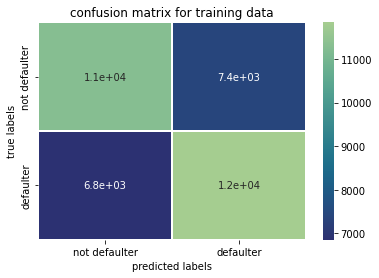

In [ ]:
labels = ['not defaulter', 'defaulter']
cm = confusion_matrix(y_train_os, y_train_class_pred)
print(cm)

ax = plt.subplot()
sb.heatmap(cm, annot=True, linewidths=1, cmap='crest_r', ax=ax)

ax.set_xlabel('predicted labels')
ax.set_ylabel('true labels')
ax.set_title('confusion matrix for training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

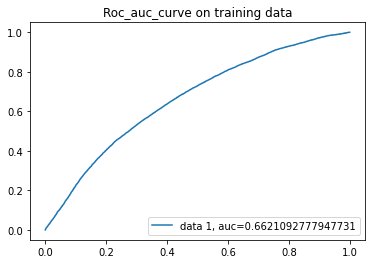

In [ ]:
y_train_pred = model_log.predict_proba(x_train_os)[:,1]
fpr, tpr, _ = roc_curve(y_train_os, y_train_pred)
auc = roc_auc_score(y_train_os, y_train_pred)
plt.plot(fpr,tpr, label='data 1, auc='+str(auc))
plt.title('Roc_auc_curve on training data')
plt.legend(loc=4)
plt.show()

In [ ]:
print_metrics(y_test_os, y_test_class_pred)

accuracy_score is 0.619944361224053
precision_score is 0.6179751631235529
recall_score is 0.6282901776160924
f1_score is 0.6230899830220713
roc_auc_score is 0.619944361224053
confusion_matrix is [[2858 1815]
 [1737 2936]]
classification_report is               precision    recall  f1-score   support

           0       0.62      0.61      0.62      4673
           1       0.62      0.63      0.62      4673

    accuracy                           0.62      9346
   macro avg       0.62      0.62      0.62      9346
weighted avg       0.62      0.62      0.62      9346



[[2858 1815]
 [1737 2936]]


[Text(0, 0.5, 'not defaulter'), Text(0, 1.5, 'defaulter')]

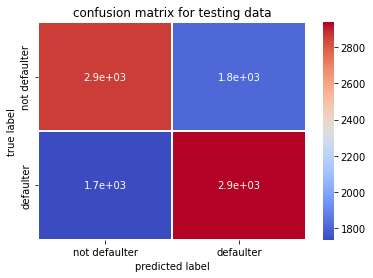

In [ ]:
labels = ['not defaulter', 'defaulter']
cm = confusion_matrix(y_test_os, y_test_class_pred)
print(cm)

ax = plt.subplot()
sb.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm', ax=ax)

ax.set_xlabel('predicted label')
ax.set_ylabel('true label')
ax.set_title('confusion matrix for testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

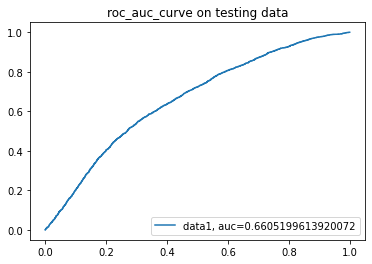

In [ ]:
y_test_proba = model_log.predict_proba(x_test_os)[:,1]
fpr, tpr, _ = roc_curve(y_test_os, y_test_proba)
auc = roc_auc_score(y_test_os, y_test_proba)
plt.plot(fpr, tpr, label='data1, auc='+str(auc))
plt.title('roc_auc_curve on testing data')
plt.legend(loc=4)
plt.show()

### **Implementing Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier()
grid_values = {'n_estimators': [50,60,70,80,90,100], 'max_depth': [3,5,7,9,11,14]}
rf_grid = GridSearchCV(rf, param_grid=grid_values, scoring='accuracy', cv=5)

rf_grid.fit(x_train_os, y_train_os)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 14],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='accuracy')

In [ ]:
rf_grid.best_params_

{'max_depth': 14, 'n_estimators': 100}

In [ ]:
optimized_rf = rf_grid.best_estimator_
optimized_rf

RandomForestClassifier(max_depth=14)

In [ ]:
rf_grid.best_score_

0.8622866857685846

In [ ]:
print(f'training_score_model : {rf_grid.score(x_train_os, y_train_os)}')

print(f'testing_score_model : {rf_grid.score(x_test_os, y_test_os)}')

training_score_model : 0.930554812476593
testing_score_model : 0.8624010271774021


In [ ]:
y_train_class_pred_rf = rf_grid.predict(x_train_os)
y_test_class_pred_rf = rf_grid.predict(x_test_os)

In [ ]:
y_test_class_pred_rf

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test

10867    0
14863    0
26562    0
14294    1
26330    0
        ..
19576    0
2473     0
10168    0
29686    0
12215    0
Name: defaulter, Length: 6000, dtype: int64

In [ ]:
print_metrics(y_train_os, y_train_class_pred_rf)

accuracy_score is 0.930554812476593
precision_score is 0.9748628075765622
recall_score is 0.8839013428923012
f1_score is 0.927156406083394
roc_auc_score is 0.930554812476593
confusion_matrix is [[18265   426]
 [ 2170 16521]]
classification_report is               precision    recall  f1-score   support

           0       0.89      0.98      0.93     18691
           1       0.97      0.88      0.93     18691

    accuracy                           0.93     37382
   macro avg       0.93      0.93      0.93     37382
weighted avg       0.93      0.93      0.93     37382



[[18265   426]
 [ 2170 16521]]


[Text(0, 0.5, 'not defaulter'), Text(0, 1.5, 'defaulter')]

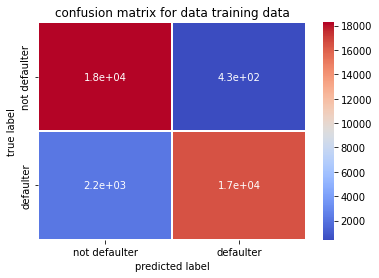

In [ ]:
labels = ['not defaulter', 'defaulter']
cm = confusion_matrix(y_train_os, y_train_class_pred_rf)
print(cm)

ax = plt.subplot()
sb.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm', ax=ax)

ax.set_xlabel('predicted label')
ax.set_ylabel('true label')
ax.set_title('confusion matrix for data training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

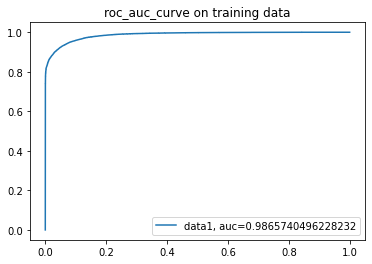

In [ ]:
y_train_pred_proba_rf = rf_grid.predict_proba(x_train_os)[::,1]

fpr,tpr,_ = roc_curve(y_train_os, y_train_pred_proba_rf)
auc = roc_auc_score(y_train_os, y_train_pred_proba_rf)
plt.plot(fpr,tpr, label='data1, auc='+str(auc))
plt.title('roc_auc_curve on training data')
plt.legend(loc=4)
plt.show()

In [ ]:
print_metrics(y_test_os, y_test_class_pred_rf)

accuracy_score is 0.8624010271774021
precision_score is 0.8987520602778432
recall_score is 0.8168200299593409
f1_score is 0.8558295964125561
roc_auc_score is 0.8624010271774021
confusion_matrix is [[4243  430]
 [ 856 3817]]
classification_report is               precision    recall  f1-score   support

           0       0.83      0.91      0.87      4673
           1       0.90      0.82      0.86      4673

    accuracy                           0.86      9346
   macro avg       0.87      0.86      0.86      9346
weighted avg       0.87      0.86      0.86      9346



[[4243  430]
 [ 856 3817]]


[Text(0, 0.5, 'not defaulter'), Text(0, 1.5, 'defaulter')]

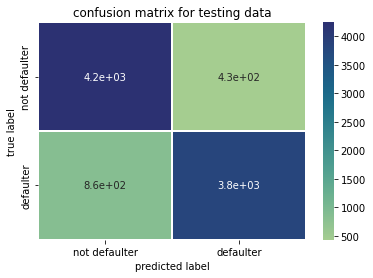

In [ ]:
label = ['not defaulter', 'defaulter']
cm = confusion_matrix(y_test_os, y_test_class_pred_rf)
print(cm)

ax = plt.subplot()
sb.heatmap(cm, annot=True, linewidths=1, cmap='crest', ax=ax)

ax.set_xlabel('predicted label')
ax.set_ylabel('true label')
ax.set_title('confusion matrix for testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

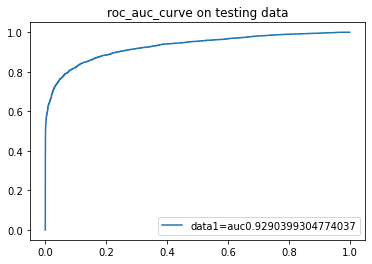

In [ ]:
y_test_pred_proba_rf = rf_grid.predict_proba(x_test_os)[::, 1]
fpr, tpr, _ = roc_curve(y_test_os, y_test_pred_proba_rf)
auc = roc_auc_score(y_test_os, y_test_pred_proba_rf)
plt.plot(fpr,tpr, label='data1=auc'+str(auc))
plt.title('roc_auc_curve on testing data')
plt.legend(loc=4)
plt.show()

**Implementing KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors' :[ 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [ ]:
knn = KNeighborsClassifier()
cv_knn = GridSearchCV(knn, param_grid, scoring='accuracy', cv=3)
cv_knn.fit(x_train_os, y_train_os)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20]},
             scoring='accuracy')

In [ ]:
cv_knn.best_score_

0.7071585143400219

In [ ]:
cv_knn.best_params_

{'n_neighbors': 5}

In [ ]:
knn_optimized = cv_knn.best_estimator_
knn_optimized

KNeighborsClassifier()

In [ ]:
print(f'training model score : {cv_knn.score(x_train_os, y_train_os)}')

print(f'testing model score : {cv_knn.score(x_test_os, y_test_os)}')

training model score : 0.8314696912952758
testing model score : 0.7393537342178472


In [ ]:
y_train_class_pred_knn = cv_knn.predict(x_train_os)
x_test_class_pred_knn = cv_knn.predict(x_test_os)

In [ ]:
x_test_class_pred_knn

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
y_test_os

38707    1
26884    1
19454    0
12363    0
4518     0
        ..
19740    0
35793    1
32857    1
17947    0
1027     0
Name: defaulter, Length: 9346, dtype: int64

In [ ]:
print_metrics(y_train_os, y_train_class_pred_knn)

accuracy_score is 0.8314696912952758
precision_score is 0.7744893890390324
recall_score is 0.9352629607832647
f1_score is 0.8473171441035335
roc_auc_score is 0.8314696912952757
confusion_matrix is [[13601  5090]
 [ 1210 17481]]
classification_report is               precision    recall  f1-score   support

           0       0.92      0.73      0.81     18691
           1       0.77      0.94      0.85     18691

    accuracy                           0.83     37382
   macro avg       0.85      0.83      0.83     37382
weighted avg       0.85      0.83      0.83     37382



[[13601  5090]
 [ 1210 17481]]


[Text(0, 0.5, 'not defaulter'), Text(0, 1.5, 'defaulter')]

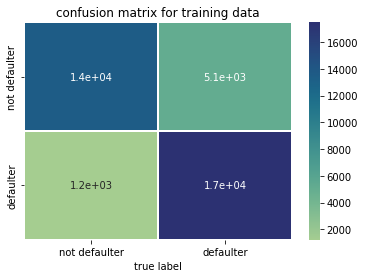

In [ ]:
labels = ['not defaulter', 'defaulter']
cm = confusion_matrix(y_train_os, y_train_class_pred_knn)
print(cm)

ax= plt.subplot()
sb.heatmap(cm, annot=True, linewidths=1, cmap='crest', ax=ax)
ax.set_xlabel('predicted label')
ax.set_xlabel('true label')
ax.set_title('confusion matrix for training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

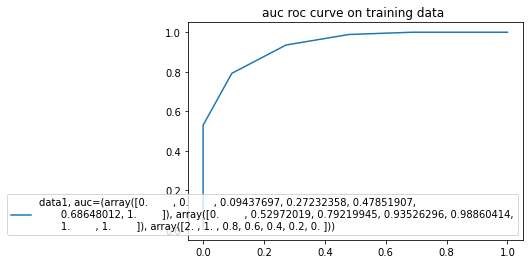

In [ ]:
y_train_pred_proba_knn = cv_knn.predict_proba(x_train_os)[::,1]

fpr,tpr,_ = roc_curve(y_train_os, y_train_pred_proba_knn)
auc = roc_curve(y_train_os, y_train_pred_proba_knn)
plt.plot(fpr,tpr, label='data1, auc='+str(auc))
plt.title('auc roc curve on training data ')
plt.legend(loc=4)
plt.show()

In [ ]:
print_metrics(y_test_os, x_test_class_pred_knn)

accuracy_score is 0.7393537342178472
precision_score is 0.6895441450601593
recall_score is 0.8707468435694414
f1_score is 0.7696236050690374
roc_auc_score is 0.7393537342178472
confusion_matrix is [[2841 1832]
 [ 604 4069]]
classification_report is               precision    recall  f1-score   support

           0       0.82      0.61      0.70      4673
           1       0.69      0.87      0.77      4673

    accuracy                           0.74      9346
   macro avg       0.76      0.74      0.73      9346
weighted avg       0.76      0.74      0.73      9346



[[2841 1832]
 [ 604 4069]]


[Text(0, 0.5, 'not defaulter'), Text(0, 1.5, 'defaulter')]

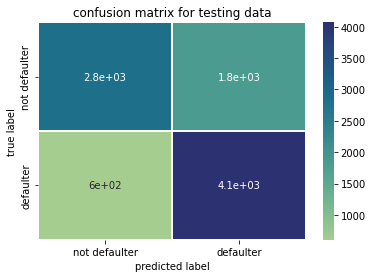

In [ ]:
labels = ['not defaulter', 'defaulter']
cm = confusion_matrix(y_test_os, x_test_class_pred_knn)
print(cm)

ax = plt.subplot()
sb.heatmap(cm, annot=True, linewidths=1, cmap='crest', ax=ax)

ax.set_xlabel('predicted label')
ax.set_ylabel('true label')
ax.set_title('confusion matrix for testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

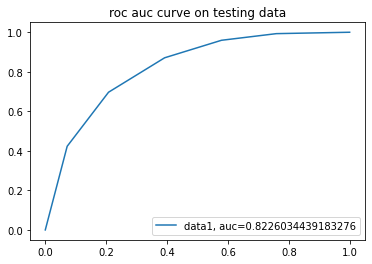

In [ ]:
y_test_pred_proba_knn = cv_knn.predict_proba(x_test_os)[::,1]

fpr,tpr,_ = roc_curve(y_test_os, y_test_pred_proba_knn)
auc = roc_auc_score(y_test_os, y_test_pred_proba_knn)
plt.plot(fpr,tpr,label='data1, auc='+str(auc))
plt.title('roc auc curve on testing data')
plt.legend(loc=4)
plt.show()

### **Implementing XG Boost algorithm**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
param_test = {'max_depth' : range(2,3,6),
'min_weight_child' : range(1,2,6)}

In [ ]:
xgb_grid = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=5,
                                                min_weight_child=1),
                        param_grid= param_test, scoring='roc_auc', cv=3)

In [ ]:
xgb_grid.fit(x_train_os, y_train_os)

GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=5, min_weight_child=1),
             param_grid={'max_depth': range(2, 3, 6),
                         'min_weight_child': range(1, 2, 6)},
             scoring='roc_auc')

In [ ]:
xgb_grid.best_params_

{'max_depth': 2, 'min_weight_child': 1}

In [ ]:
optimized_xgb = xgb_grid.best_estimator_
optimized_xgb

XGBClassifier(max_depth=2, min_weight_child=1)

In [ ]:
xgb_grid.best_score_

0.9121426599393082

In [ ]:
print(f'training model score : {xgb_grid.score(x_train_os, y_train_os)}')

training model score : 0.913650502597969


In [ ]:
y_train_class_pred_xgb = xgb_grid.predict(x_train_os)
y_test_class_pred_xgb = xgb_grid.predict(x_test_os)

In [ ]:
y_test_class_pred_xgb

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test_os

38707    1
26884    1
19454    0
12363    0
4518     0
        ..
19740    0
35793    1
32857    1
17947    0
1027     0
Name: defaulter, Length: 9346, dtype: int64

In [ ]:
print_metrics(y_train_os, y_train_class_pred_xgb)

accuracy_score is 0.8463699106521856
precision_score is 0.8944674628320741
recall_score is 0.7854047402493178
f1_score is 0.836395749651027
roc_auc_score is 0.8463699106521856
confusion_matrix is [[16959  1732]
 [ 4011 14680]]
classification_report is               precision    recall  f1-score   support

           0       0.81      0.91      0.86     18691
           1       0.89      0.79      0.84     18691

    accuracy                           0.85     37382
   macro avg       0.85      0.85      0.85     37382
weighted avg       0.85      0.85      0.85     37382



[[16959  1732]
 [ 4011 14680]]


[Text(0, 0.5, 'not defaulter'), Text(0, 1.5, 'defaulter')]

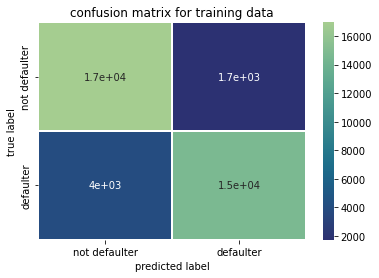

In [ ]:
label = ['not defaulter', 'defaulter']
cm = confusion_matrix(y_train_os, y_train_class_pred_xgb)
print(cm)

ax = plt.subplot()
sb.heatmap(cm, annot=True, linewidths=1, cmap='crest_r', ax=ax)

ax.set_xlabel('predicted label')
ax.set_ylabel('true label')
ax.set_title('confusion matrix for training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

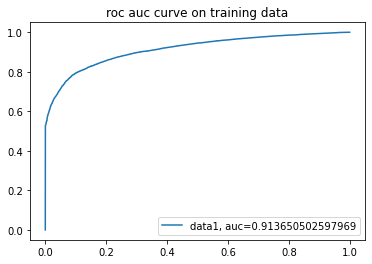

In [ ]:
y_train_proba_pred_xgb = xgb_grid.predict_proba(x_train_os)[::,1]

fpr,tpr,_ = roc_curve(y_train_os, y_train_proba_pred_xgb)
auc = roc_auc_score(y_train_os, y_train_proba_pred_xgb)
plt.plot(fpr,tpr, label='data1, auc='+str(auc))
plt.title('roc auc curve on training data')
plt.legend(loc=4)
plt.show()

In [ ]:
print_metrics(y_test_os, y_test_class_pred_xgb)

accuracy_score is 0.8421784720736144
precision_score is 0.8871670702179176
recall_score is 0.7840787502674941
f1_score is 0.8324434851755084
roc_auc_score is 0.8421784720736143
confusion_matrix is [[4207  466]
 [1009 3664]]
classification_report is               precision    recall  f1-score   support

           0       0.81      0.90      0.85      4673
           1       0.89      0.78      0.83      4673

    accuracy                           0.84      9346
   macro avg       0.85      0.84      0.84      9346
weighted avg       0.85      0.84      0.84      9346



[[4207  466]
 [1009 3664]]


[Text(0, 0.5, 'not defaulter'), Text(0, 1.5, 'defaulter')]

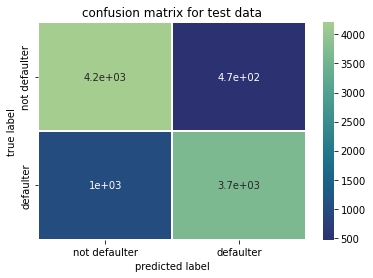

In [ ]:
labels = ['not defaulter', 'defaulter']
cm = confusion_matrix(y_test_os, y_test_class_pred_xgb)
print(cm)

ax = plt.subplot()
sb.heatmap(cm, annot=True , linewidths=1, cmap='crest_r', ax=ax)

ax.set_xlabel('predicted label')
ax.set_ylabel('true label')
ax.set_title('confusion matrix for test data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

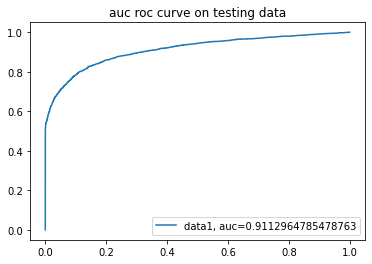

In [ ]:
y_test_proba_pred_xgb = xgb_grid.predict_proba(x_test_os)[::,1]

fpr,tpr,_ = roc_curve(y_test_os, y_test_proba_pred_xgb)
auc = roc_auc_score(y_test_os, y_test_proba_pred_xgb)
plt.plot(fpr,tpr, label='data1, auc='+str(auc))
plt.title('auc roc curve on testing data')
plt.legend(loc=4)
plt.show()

### **Model summary for train data**

In [ ]:
from prettytable import PrettyTable
train = PrettyTable(['SL NO', 'Model name','Train accuracy score', 'Train precision score', 'Train recall score', 'Train F1 score', 'Train Roc Auc score'])
train.add_row(['1', 'Logistic Regression','0.6184527312610347', '0.6149771499792273', '0.6335669573591568','0.6241336601048831', '0.6184527312610347'])
train.add_row(['2','Random Forest Classifier', ' 0.930554812476593','0.9748628075765622','0.8839013428923012','0.927156406083394', '0.930554812476593'])
train.add_row(['3','KNN Classifier','0.8314696912952758',' 0.7744893890390324','0.9352629607832647','0.8473171441035335','0.8314696912952757'])
train.add_row(['4', 'XGBoost Classifier','0.8463699106521856','0.8944674628320741','0.7854047402493178','0.836395749651027','0.8463699106521856'])

print(train)

+-------+--------------------------+----------------------+-----------------------+--------------------+--------------------+---------------------+
| SL NO |        Model name        | Train accuracy score | Train precision score | Train recall score |   Train F1 score   | Train Roc Auc score |
+-------+--------------------------+----------------------+-----------------------+--------------------+--------------------+---------------------+
|   1   |   Logistic Regression    |  0.6184527312610347  |   0.6149771499792273  | 0.6335669573591568 | 0.6241336601048831 |  0.6184527312610347 |
|   2   | Random Forest Classifier |   0.930554812476593  |   0.9748628075765622  | 0.8839013428923012 | 0.927156406083394  |  0.930554812476593  |
|   3   |      KNN Classifier      |  0.8314696912952758  |   0.7744893890390324  | 0.9352629607832647 | 0.8473171441035335 |  0.8314696912952757 |
|   4   |    XGBoost Classifier    |  0.8463699106521856  |   0.8944674628320741  | 0.7854047402493178 | 0.83639

### **Model summary for test data**

In [ ]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO', 'Model name','Test accuracy score', 'Test precision score', 'Test recall score', 'Test F1 score', 'Test Roc Auc score'])
test.add_row(['1','Logistic Regression','0.619944361224053', '0.6179751631235529','0.6282901776160924','0.6230899830220713','0.619944361224053' ])
test.add_row(['2','Random Forest Classifier','0.8624010271774021','0.8987520602778432','0.8168200299593409','0.8558295964125561','0.8624010271774021'])
test.add_row(['3','KNN Classifier', '0.7393537342178472','0.6895441450601593','0.8707468435694414','0.7696236050690374','0.7393537342178472'])
test.add_row(['4', 'XGBoost Classifier','0.8421784720736144','0.8871670702179176',' 0.7840787502674941','0.8324434851755084','0.8421784720736143'])

print(test)

+-------+--------------------------+---------------------+----------------------+---------------------+--------------------+--------------------+
| SL NO |        Model name        | Test accuracy score | Test precision score |  Test recall score  |   Test F1 score    | Test Roc Auc score |
+-------+--------------------------+---------------------+----------------------+---------------------+--------------------+--------------------+
|   1   |   Logistic Regression    |  0.619944361224053  |  0.6179751631235529  |  0.6282901776160924 | 0.6230899830220713 | 0.619944361224053  |
|   2   | Random Forest Classifier |  0.8624010271774021 |  0.8987520602778432  |  0.8168200299593409 | 0.8558295964125561 | 0.8624010271774021 |
|   3   |      KNN Classifier      |  0.7393537342178472 |  0.6895441450601593  |  0.8707468435694414 | 0.7696236050690374 | 0.7393537342178472 |
|   4   |    XGBoost Classifier    |  0.8421784720736144 |  0.8871670702179176  |  0.7840787502674941 | 0.8324434851755084 |